# Run U1B model

The idea is run the model. 
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator

run diccionary

In [3]:
#Open the file that will created the LesHouches file
xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

L2 = -7.22E-2

#Modify one parameter
xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2

#Write and created the Leshouches file generator
pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict)  

#file = subprocess.getoutput('cat LesHouches.in.U1B_low')

In [4]:
# Tiempo inicial
t1=time.time() 

x=[]

#Change
Num = 5

for i in range (0,Num):
    
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    L2 = -7.23E-2
    Fi11 = 0.112
    YA1 = 0.5
    YC1 = 1.0 #control the Fvv mass
    vx = np.random.uniform(1500,6000)
    
    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    
    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    SPheno_output = subprocess.getoutput('cat SPheno.spc.U1B')
    
    #capturo algo de spheno
    MZp = eval(SPheno_output.split('# VWm')[1].split()[1])
    
    #run micromegas 
    mo = subprocess.getoutput('~/Work/micromegas_5.0.4/U1B/./CalcOmega') #Full
    #mo = subprocess.getoutput('~/Work/micromegas_5.0.4/U1B/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    #print("i=",i,"Omega=",Omega)
    
    x.append([L2,Omega,vx,MZp])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['L2','Omega','vx','MZp'])  

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 6.8636627197265625 s running 5 times


In [5]:
xd

,L2,Omega,vx,MZp
0,-0.0723,8.30,4367.912909,13373.9476
1,-0.0723,10.30,4882.141710,14948.4459
2,-0.0723,12.60,5430.693523,16628.0366
3,-0.0723,9.61,4718.335276,14446.8915
4,-0.0723,13.80,5708.488435,17478.6035


In [6]:
mo.splitlines()

['',
 'Masses of odd sector Particles:',
 '~Chi : MChi0 =  2018.3 || ',
 'Xf=2.28e+01 Omega h^2=1.38e+01',
 '',
 '# Channels which contribute to 1/(omega) more than 1%.',
 '# Relative contributions in % are displayed',
 '   43% ~Chi0 ~chi0 ->eD1 ED1 ',
 '   11% ~Chi0 ~chi0 ->nu2 nu3 ',
 '   11% ~Chi0 ~chi0 ->nu4 nu5 ',
 '    6% ~Chi0 ~chi0 ->nu2 nu2 ',
 '    6% ~Chi0 ~chi0 ->nu3 nu3 ',
 '    6% ~Chi0 ~chi0 ->nu4 nu4 ',
 '    6% ~Chi0 ~chi0 ->nu5 nu5 ',
 '    2% ~Chi0 ~chi0 ->u2 U2 ',
 '    2% ~Chi0 ~chi0 ->d2 D2 ',
 '    2% ~Chi0 ~chi0 ->u1 U1 ',
 '    2% ~Chi0 ~chi0 ->d1 D1 ',
 '    2% ~Chi0 ~chi0 ->d3 D3 ',
 '    2% ~Chi0 ~chi0 ->u3 U3 ']

In [7]:
xd

,L2,Omega,vx,MZp
0,-0.0723,8.30,4367.912909,13373.9476
1,-0.0723,10.30,4882.141710,14948.4459
2,-0.0723,12.60,5430.693523,16628.0366
3,-0.0723,9.61,4718.335276,14446.8915
4,-0.0723,13.80,5708.488435,17478.6035


In [8]:
SPheno_output.splitlines()

['# SUSY Les Houches Accord 2 - U1B Spectrum + Decays + Flavor Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.3  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.12.3  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on the FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop masss corrections to Higgs fields based on ',
 '#   M. D. Go

## Z' mass

\begin{equation}
M_{Z^{'}} =Q_sg^{'} v_S =  5 g^{'} v_S
\end{equation}

In [9]:
Qs = 5.
xd['MZpt'] = Qs*0.5*xd.vx

In [10]:
xd.MZpt

0    10919.782272
1    12205.354276
2    13576.733808
3    11795.838190
4    14271.221087
Name: MZpt, dtype: float64

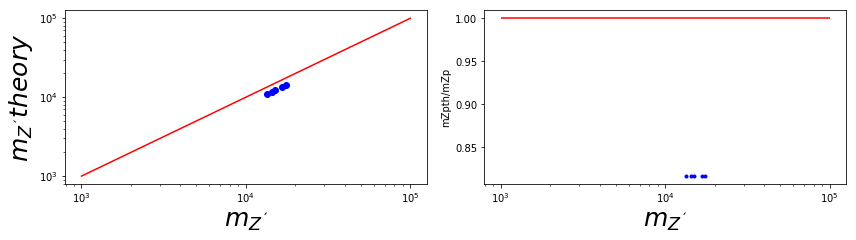

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.loglog(xd.MZp, xd.MZpt,'bo')

a = np.linspace(1e3,1e5,10)
plt.plot(a,a,'r-')
plt.xlabel(r'$m_{Z^´}$',size=25)
plt.ylabel(r'$m_{Z^´} theory$',size=25)

plt.subplot(222)
plt.hlines(1,1e3,1e5,'r')
plt.semilogx(xd.MZp, xd.MZpt/xd.MZp,'b.')
plt.ylabel('mZpth/mZp')
plt.xlabel(r'$m_{Z^´}$',size=25)

plt.tight_layout()
plt.show()